<a href="https://colab.research.google.com/github/jeffheaton/present/blob/master/youtube/gan_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# styleGAN 스타일 탐색


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


stylegan2-ada 불러오기 

In [ ]:
import sys
ada_path = "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada"
sys.path.insert(0, ada_path)

import dnnlib

In [ ]:
import cv2 
import pickle
from google.colab.patches import cv2_imshow
import argparse
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import re
import sys


#----------------------------------------------------------------------------

# 시드를 받아서 벡터차원(512) 크기로 난수 행렬 생성 
def expand_seed(seeds, vector_size):
  result = []

  for seed in seeds:
    rnd = np.random.RandomState(seed)
    # randn(m, n) : matrix array(m, n) 으로 생성 
    result.append( rnd.randn(1, vector_size) ) 
  return result

# 이미지 생성함수
def generate_images(Gs, seeds, truncation_psi, prefix):
    noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]

    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    if truncation_psi is not None:
        Gs_kwargs.truncation_psi = truncation_psi

    for seed_idx, seed in enumerate(seeds):
        print('Generating image for seed %d/%d ...' % (seed_idx, len(seeds)))
        rnd = np.random.RandomState(0)
        tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
        images = Gs.run(seed, None, **Gs_kwargs) # [minibatch, height, width, channel]
        path = f"/content/{prefix}-{seed_idx+1}.png"
        PIL.Image.fromarray(images[0], 'RGB').save(path)


In [ ]:
# 학습해둔 모델 불러오기 
tflib.init_tf()
network_pkl = "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/results/00005-tfrecord_total-mirror-11gb-gpu-bg-resumecustom/network-snapshot-000080.pkl"

print('Loading networks from "%s"...' % network_pkl)
with dnnlib.util.open_url(network_pkl) as fp:
    _G, _D, Gs = pickle.load(fp)
    
vector_size = Gs.input_shape[1:][0]

Loading networks from "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/results/00005-tfrecord_total-mirror-11gb-gpu-bg-resumecustom/network-snapshot-000080.pkl"...


# 이미지 생성

Generating image for seed 0/1 ...


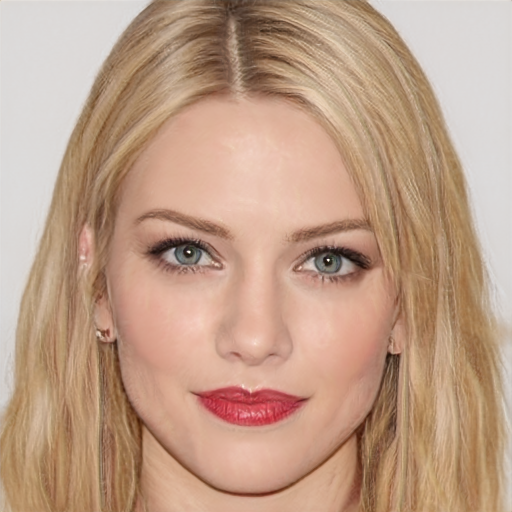

In [ ]:
# seed 지정해서 vector_size matrix 받음 
seeds = expand_seed([9223], vector_size)

# 이미지 생성(모델, seeds, channel, 저장할 이미지명)
generate_images(Gs, seeds, 0.5, "image")
img = cv2.imread('/content/image-1.png')   
cv2_imshow(img) 

위의 이미지와 같은 시드로 이미지를 생성

512차원의 벡터를 하나씩 - or + 로 조절하면서 스타일을 찾아나감 

여러개 동시에 조절 가능 

Generating image for seed 0/1 ...


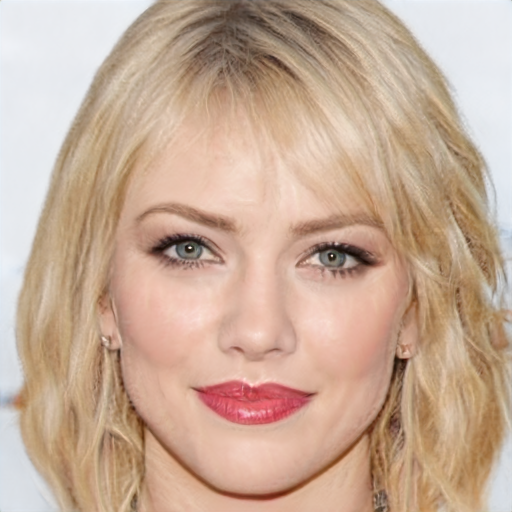

In [ ]:
seeds = expand_seed([9223], vector_size)

seeds[0][0][419] = -20
seeds[0][0][423] = -20

generate_images(Gs, seeds, 0.5, "image")
img = cv2.imread('/content/image-1.png')   
cv2_imshow(img) 
